# Aim of our project

 The primary aim of this task is twofold: first, to identify and locate the license plates affixed to the
 vehicles in the images, and second, to perform character recognition on these license plates, deciphering
 the alphanumeric text they contain.

In [33]:
# !pip install -q paddlepaddle
# !pip install -q "paddleocr>=2.0.1"

We import the required libraries for our tasks. We use the pipeline from the transformers library for setting up a zero-shot object detection model. The PIL library is used for image processing.

In [80]:
from transformers import pipeline
from PIL import Image
from PIL import ImageDraw
import cv2
import os

We specify the model checkpoint for the object detection pipeline. The model google/owlv2-base-patch16-ensemble is used for zero-shot object detection, which allows us to detect objects without having a pre-defined set of classes. We set the model to use a GPU if available.

In [36]:
checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(
    model=checkpoint,
    task="zero-shot-object-detection",
    device="cpu"
)

We load an image from the dataset. This image will be used as input for our object detection and OCR tasks. The image is then displayed to verify it has been loaded correctly.

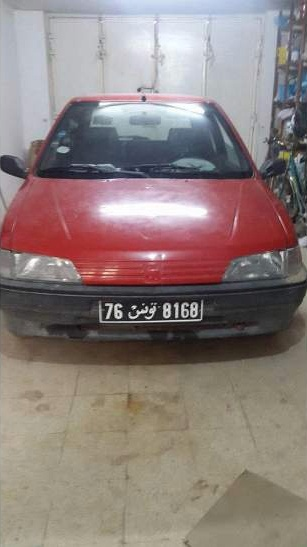

In [47]:
original_image = Image.open("/content/drive/MyDrive/license plate detection/license_plates_detection_train/2.jpg")
original_image


We perform * object detection * on the loaded image to locate the license plate. The detector pipeline is used with the candidate_labels parameter set to ["license plate"], indicating we want to detect license plates.

In [48]:
prediction = detector(
    original_image,
    candidate_labels=["license plate"],
)[0]
print(prediction)

{'score': 0.4086146950721741, 'label': 'license plate', 'box': {'xmin': 99, 'ymin': 299, 'xmax': 203, 'ymax': 323}}


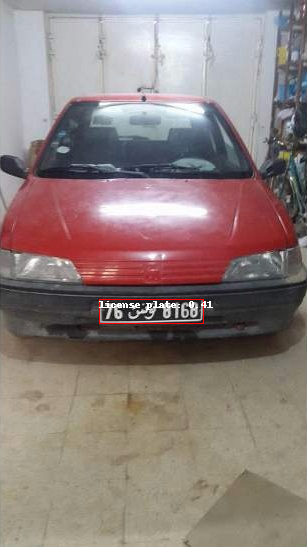

In [49]:
temporary_image = original_image.copy()
draw = ImageDraw.Draw(temporary_image)
box = prediction["box"]
label = prediction["label"]
score = prediction["score"]
xmin, ymin, xmax, ymax = box.values()
draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
draw.text((xmin, ymin), f"{label}: {round(score, 2)}", fill="white")
temporary_image

We then crop the image to isolate the detected license plate. This cropped image will be used as input for the OCR task.

In [85]:
cropped_image = original_image.crop(list(box.values()))
cropped_image

# OCR
We import additional libraries for the OCR task. PaddleOCR is used to perform OCR on the cropped license plate image, and cv2 and numpy are used for image processing.

In [51]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
import numpy

In [52]:
ocr = PaddleOCR(use_angle_cls=True, lang="en") #initialize the paddleocr

[2024/06/23 09:35:53] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [91]:
cropped_numpy_image = numpy.array(cropped_image)
cropped_numpy_image_rgb = cropped_numpy_image[:, :, ::-1].copy()

In [96]:
ocr_result = ocr.ocr(cropped_numpy_image_rgb, cls=True)
if ocr_result:
        print(f"License Plate Number: {ocr_result[0][0][1][0]}")
else:
    print('do not recognised')

[2024/06/23 10:21:43] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02717900276184082
[2024/06/23 10:21:43] ppocr DEBUG: cls num  : 1, elapsed : 0.01852107048034668
[2024/06/23 10:21:44] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08916258811950684
License Plate Number: 768168


'768168'

In [102]:
#complete code
cars=[]
cars_path='/content/drive/MyDrive/license plate detection/license_plates_detection_train'
for file in os.listdir(cars_path):
  if file.endswith('.jpg'):
    # Assuming you want to store the full path to the image
    cars.append(os.path.join(cars_path, file))

#defining model
checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(
    model=checkpoint,
    task="zero-shot-object-detection",
    device="cpu"
)



#object detection
for i in cars:
  original_image = Image.open(i)


  prediction = detector(
      original_image,
      candidate_labels=["license plate"],
  )[0]
  print(prediction)

  temporary_image = original_image.copy()
  draw = ImageDraw.Draw(temporary_image)
  box = prediction["box"]
  label = prediction["label"]
  score = prediction["score"]
  xmin, ymin, xmax, ymax = box.values()
  draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
  draw.text((xmin, ymin), f"{label}: {round(score, 2)}", fill="white")


  #cropping license plate image
  cropped_image = original_image.crop(list(box.values()))

  #OCR
  ocr = PaddleOCR(use_angle_cls=True, lang="en") #initialize the paddleocr
  cropped_numpy_image = numpy.array(cropped_image)
  cropped_numpy_image_rgb = cropped_numpy_image[:, :, ::-1].copy()

  ocr_result = ocr.ocr(cropped_numpy_image_rgb, cls=True)
  if ocr_result is not None:
    try:
        if len(ocr_result[0][0][1][0]) > 0:
            print(f"License Plate Number: {ocr_result[0][0][1][0]}")
        else:
            print('1 1 1 1 1 1')
    except TypeError as e:
        print(f"Error: {e}")
  else:
    print('Error occurred during OCR processing')


{'score': 0.543155312538147, 'label': 'license plate', 'box': {'xmin': 547, 'ymin': 221, 'xmax': 591, 'ymax': 257}}
[2024/06/23 10:38:24] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_inf

IndexError: list index out of range